## This part is to explore the arima model.

In [27]:
import pickle
saveddata = open('.\Dataset_B02_10mins.pkl', 'rb')

data2 = pickle.load(saveddata)

from statsmodels.tsa.stattools import adfuller
from numpy import log

In [2]:
dataprice = {'Close':data2}

In [3]:
import pandas as pd
data = pd.DataFrame(dataprice)

In [5]:
result = adfuller(data.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.966416
p-value: 0.301490


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

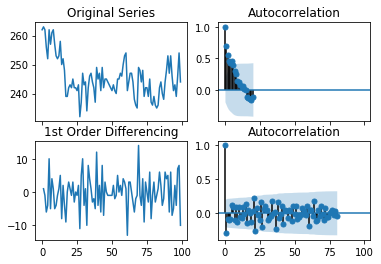

In [7]:
# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(data.Close[:100]), axes[0, 0].set_title('Original Series')
plot_acf(data.Close[:100], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Close[:100].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Close[:100].diff().dropna(), ax=axes[1, 1],lags =80)

plt.show()

In [8]:
result = adfuller(data.Close.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.740419
p-value: 0.000000


After one diff, the p-value is good. So d ===1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


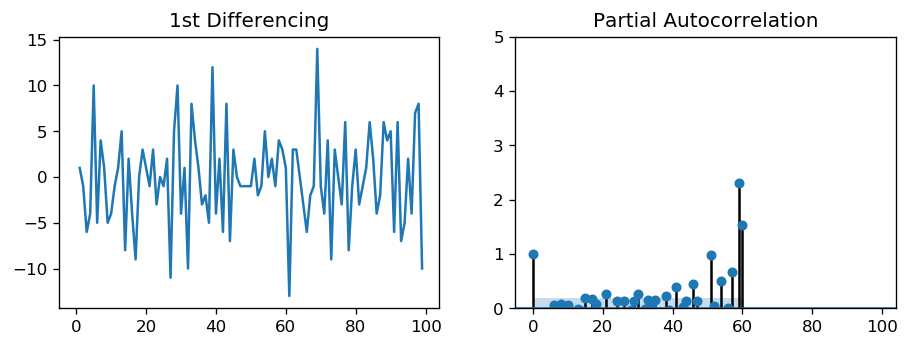

In [9]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.Close[:100].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.Close[:100].diff().dropna(), ax=axes[1],lags =60)

plt.show()

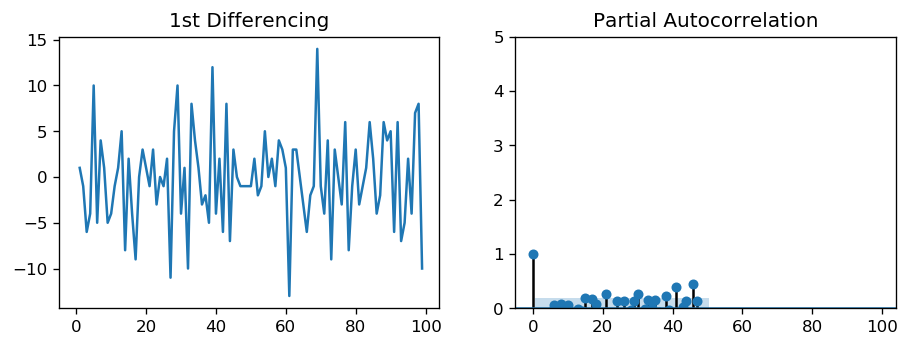

In [10]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.Close[:100].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.Close[:100].diff().dropna(), ax=axes[1],lags =50)

plt.show()

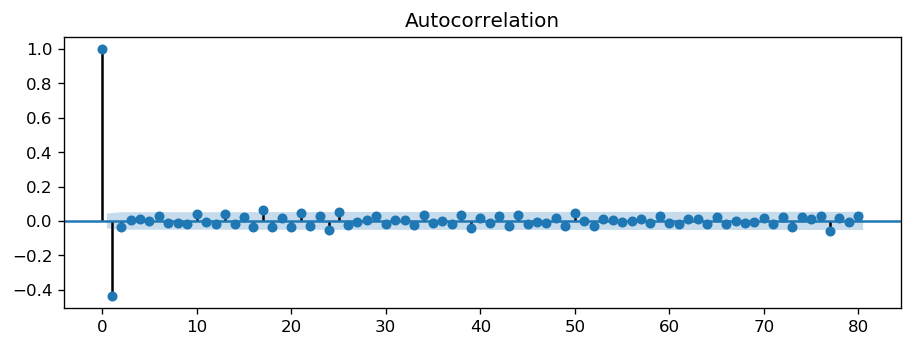

In [11]:
# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,1.2))
plot_acf(data.Close.diff().dropna(), lags =80)

plt.show()

In [12]:
# The result shows that  q ==2, but p is not clear first try  112
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data.Close, order=(1,1,2))
model_fit = model.fit(disp =0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2039
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6028.469
Method:                       css-mle   S.D. of innovations              4.653
Date:                Mon, 10 May 2021   AIC                          12066.939
Time:                        00:15:09   BIC                          12095.040
Sample:                             1   HQIC                         12077.247
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0440      0.061     -0.718      0.473      -0.164       0.076
ar.L1.D.Close     0.9532      0.020     48.543      0.000       0.915       0.992
ma.L1.D.Close    -1.6225      0.024    -

In [13]:
from statsmodels.tsa.arima_model import ARIMA

# 2,1,2 ARIMA Model
model = ARIMA(data.Close, order=(2,1,2))
model_fit = model.fit(disp =0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2039
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6026.432
Method:                       css-mle   S.D. of innovations              4.648
Date:                Mon, 10 May 2021   AIC                          12064.863
Time:                        00:15:34   BIC                          12098.584
Sample:                             1   HQIC                         12077.233
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0439      0.060     -0.733      0.463      -0.161       0.073
ar.L1.D.Close     1.0133      0.037     27.378      0.000       0.941       1.086
ar.L2.D.Close    -0.0688      0.034     

In [14]:
model = ARIMA(data.Close, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2039
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6039.150
Method:                       css-mle   S.D. of innovations              4.677
Date:                Mon, 10 May 2021   AIC                          12086.300
Time:                        00:16:03   BIC                          12108.781
Sample:                             1   HQIC                         12094.547
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0408      0.038     -1.068      0.286      -0.116       0.034
ar.L1.D.Close     0.0022      0.032      0.069      0.945      -0.061       0.066
ma.L1.D.Close    -0.6324      0.023    -

### The  model with order(2,1,2) has the lowest AIC, so we decide 212

In [15]:
from statsmodels.tsa.arima_model import ARIMA

# 2,1,2 ARIMA Model
model = ARIMA(data.Close, order=(2,1,2))
model_fit = model.fit(disp =0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2039
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6026.432
Method:                       css-mle   S.D. of innovations              4.648
Date:                Mon, 10 May 2021   AIC                          12064.863
Time:                        00:17:02   BIC                          12098.584
Sample:                             1   HQIC                         12077.233
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0439      0.060     -0.733      0.463      -0.161       0.073
ar.L1.D.Close     1.0133      0.037     27.378      0.000       0.941       1.086
ar.L2.D.Close    -0.0688      0.034     

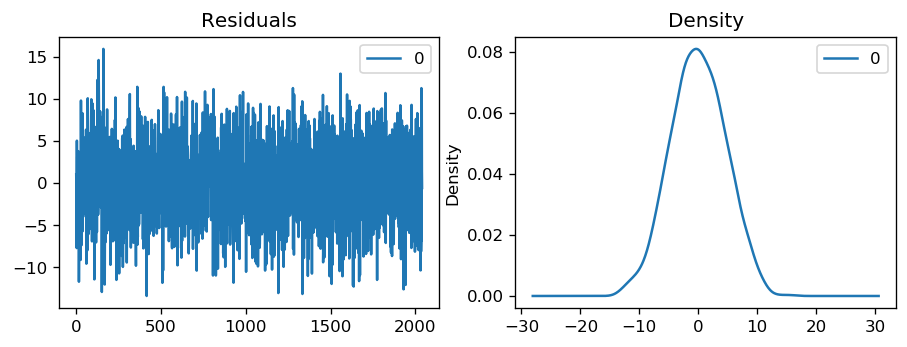

In [16]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

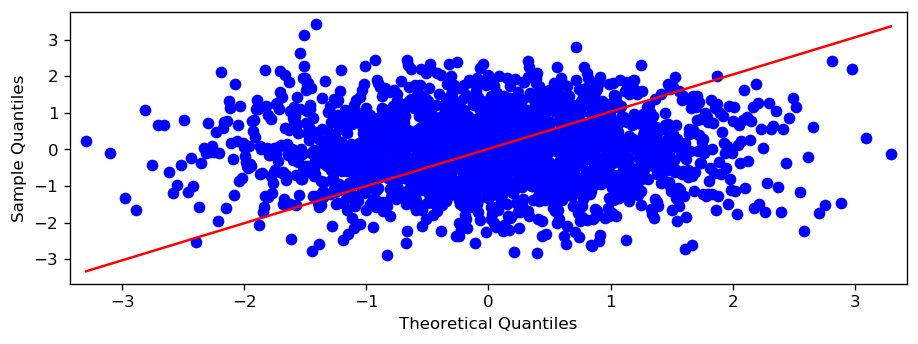

In [17]:
resid = residuals

from statsmodels.graphics.api import qqplot

qqplot(resid, line='q', fit=True)

plt.show()

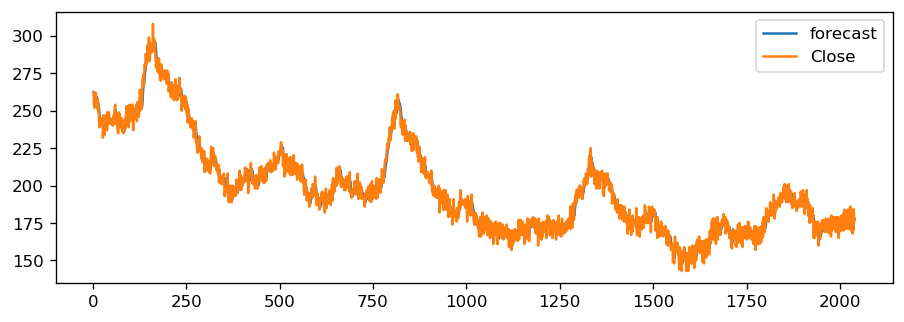

In [18]:
# plot the prediction
model_fit.plot_predict(dynamic=False)
plt.show()

(0, 200)

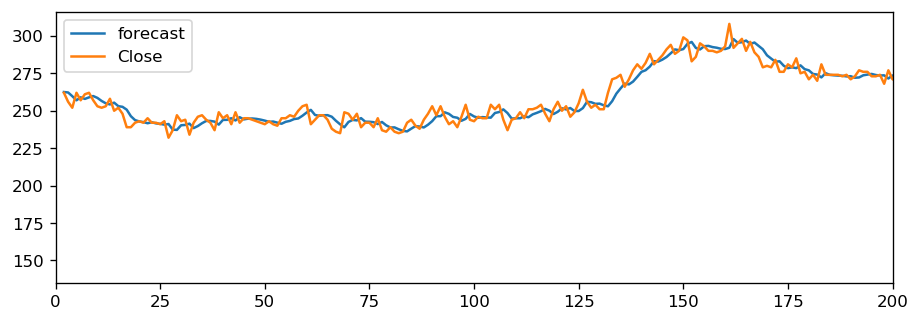

In [19]:
# see in a smaller range
model_fit.plot_predict(dynamic=False)
plt.xlim(0,200)

In [20]:
pred = model_fit.predict(dynamic =False,typ ='levels')

In [22]:
pred_d = model_fit.predict(dynamic =False)
pred_list =list(pred_d)
# insert two values
pred_list.insert(0,0)
pred_list.insert(0,0)
pred_list

[0,
 0,
 -0.5013205994164893,
 0.20567037489371298,
 3.7237661286954777,
 4.971079406769761,
 -3.029658544298783,
 0.8927941534255877,
 -2.059690108866467,
 -2.184030190975956,
 1.5808097309623648,
 3.5593380589130525,
 2.967850892926342,
 1.2147141048577454,
 -2.590695522521801,
 3.0599035656775944,
 0.6255779868909714,
 2.7225577206199176,
 7.357103894267573,
 4.742885028237302,
 0.8729636319611371,
 -0.6016812250997433,
 -0.3383938034921248,
 -2.6903547948653195,
 -0.4431546711308858,
 -0.7420980084130397,
 -0.28445492696203534,
 -1.8646685227050899,
 5.401573400841152,
 0.20661800197144586,
 -6.696777685635125,
 -2.4751394450929065,
 -2.6116007359432354,
 4.412064558711091,
 -2.224714115072807,
 -4.335044950357563,
 -3.8149699827094916,
 -0.7926898791559664,
 0.7355896397265349,
 3.7310869515569536,
 -5.126432374893712,
 -1.0613650056680068,
 -1.9929476980341807,
 2.5161588395155636,
 -3.313428343677464,
 2.224938077129969,
 -0.2978658246866433,
 -0.16898937431250605,
 0.5643238348

In [23]:
pred_2= [round(i,2) for i in pred_list]

In [24]:
data['pred_d'] =pred_2

In [28]:
data.head()

,Close,pred_d
0,262,0.00
1,263,0.00
2,262,-0.50
3,256,0.21
4,252,3.72


In [29]:
def trading(df,initial_money =1000, buy_diff = 1, sell_diff = -1):
    hold = 0
    money = initial_money
    money_memory =[money]
    for i in range(1,df.shape[0]):
        if df.pred_d[i] > buy_diff and hold ==0:
            buyprice = df.Close[i-1]
            print('{}mins，buy at {}'.format(i*10, buyprice))
            hold = 1
        if hold ==1 and df.pred_d[i] < sell_diff:
            sellprice = df.Close[i-1]
            money = money*(sellprice/buyprice)
            print('{}mins, sell at {}，total_gain:{}'.format(i*10, sellprice,(money - initial_money)))
            hold = 0
        money_memory.append(money)
    return money_memory

In [30]:
result =trading(data)

40mins，buy at 256
60mins, sell at 262，total_gain:23.4375
100mins，buy at 257
140mins, sell at 258，total_gain:27.419747081712103
150mins，buy at 250
230mins, sell at 245，total_gain:6.8713521400778745
280mins，buy at 232
300mins, sell at 247，total_gain:71.97079301120357
330mins，buy at 234
340mins, sell at 242，total_gain:108.61936713124487
390mins，buy at 237
400mins, sell at 249，total_gain:164.75199331510544
430mins，buy at 241
440mins, sell at 249，total_gain:203.4159598981796
450mins，buy at 242
550mins, sell at 245，total_gain:218.33433956633894
620mins，buy at 241
700mins, sell at 249，total_gain:258.77697324488963
740mins，buy at 239
780mins, sell at 245，total_gain:290.3780688075228
790mins，buy at 237
850mins, sell at 242，total_gain:317.60123481612027
940mins，buy at 246
980mins, sell at 246，total_gain:317.60123481612027
1000mins，buy at 244
1050mins, sell at 254，total_gain:371.60128542333814
1080mins，buy at 244
1120mins, sell at 249，total_gain:399.7078691410295
1180mins，buy at 248
1200mins, sel

Text(0, 0.5, 'total_money')

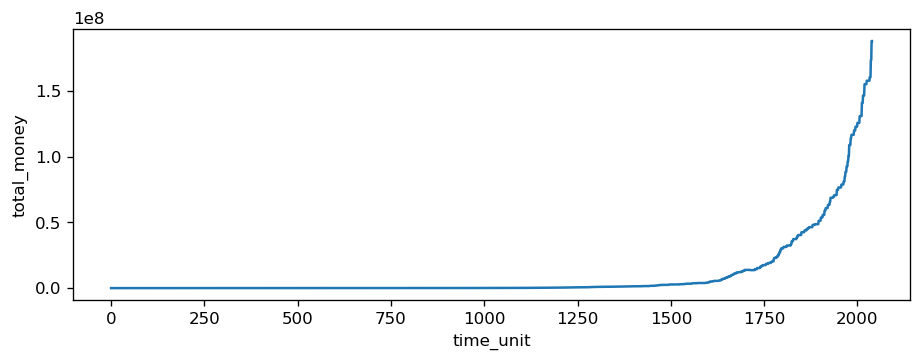

In [33]:
plt.plot(result)
plt.xlabel("time_unit")
plt.ylabel("total_money")

### The result is amazing, it has a quite good performance.